<h1><center>Trabajo Práctico 2</center></h1>

## Imports

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Cuáles parecen ser los atributos (i.e., píxeles) más relevantes para predecir el dígito al que corresponde la imagen? ¿Cuáles no? ¿Creen que se pueden descartar atributos

In [9]:
#Defino una sumatoria para trasponer las imagene sy poder observar de mejor manera los atributos más y menos importantes.
"""
suma = data_imgs[0]
for i in range(1,len(data_chrs)):
    if data_chrs[i] == 8:
        suma = suma + data_imgs[i]

plt.figure(figsize=(10, 8))
plt.imshow(suma, cmap='gray')
plt.title('Imagenes Traspuestas')
plt.axis('off')
plt.show()
"""

"\nsuma = data_imgs[0]\nfor i in range(1,len(data_chrs)):\n    if data_chrs[i] == 8:\n        suma = suma + data_imgs[i]\n\nplt.figure(figsize=(10, 8))\nplt.imshow(suma, cmap='gray')\nplt.title('Imagenes Traspuestas')\nplt.axis('off')\nplt.show()\n"

Los atributos aparentemente más relevantes para la predicción de dígitos son los pixeles del centro, ya que contienen mas información y datos más clave para la identificación de estos numeros, asi mismo se puede afirmar que los pixeles de la periferia son menos importantes ya que contienen menos información, esto se puede notar mejor si es trasponemos imagenes, se puede observar que hay mayor densidad en el centro de la matriz.

## Hay dígitos que son parecidos entre sí? Por ejemplo, ¿qué es más fácil de diferenciar: las imágenes correspondientes a los dígitos 0 y 1, ó las imágenes de 5 y 6?

In [ ]:
#Poner codigo sumando un 1 y un 0, un 5 y un 6
suma = data_chrs[6]
for i in range(0,1000):
    if data_chrs[i] == 5:
        suma =+ data_chrs[i]
print()
for i in range(0,1000):
    if data_chrs[i] == 1:
        suma =+ data_chrs[i]

Siguiendo el hilo del anterior punto, el grado de dificultad para diferenciar imagenes depende directamente de en la cantidad y densidad de los pixeles coinciden cuando se trasponen ambas imagenes, un 1 y un 0 no tienen las mismas zonas criticas para diferenciar, a cambio el 5 y el 6 se parecen bastante y coinciden en muchas de las de las posiciones de sus pixeles.

# Tomen una de las clases, por ejemplo el dígito 7. ¿Son todas las imágenes muy similares entre sí?

In [ ]:
#For loop sumando y mostrando la suma de 1,5 y 10 sietes 

No, tampoco son extremadamente diferentes, se en lo escencial pero no son exactamente iguales, si uno hace la sumatoria de las imagenes que representan el 7 van a haber posiciones con muy alta densidad de pixeles, sin embargo tambien se puede notar que estan más o menos distribuidos uniformemente.

## 1) Carga de datos y filtro los numeros pedidos

In [5]:
carpeta = 'C:/Users/nicow/Desktop/Facultad/LaboDeDatos/LaboDatos_TP2/'
data_imgs = np.load(carpeta+'mnistc_images.npy') 
data_chrs = np.load(carpeta+'mnistc_labels.npy')[:, np.newaxis]

dataImgs = [] #uso reshape para tener todas las matrices como un array
for i in range(0, len(data_chrs)):
    dataImgs.append(data_imgs[i, :, :, 0].reshape(-1))

dataImgs = np.asarray(dataImgs)

imgs = []
chrs = []
for i in range(0, len(data_chrs)): #Filtro los numeros a analizar
    if data_chrs[i].item() in {1, 2, 3, 4, 9}:
        imgs.append(data_imgs[i, :, :, 0].reshape(-1))
        chrs.append(data_chrs[i].item())
imgs = np.asarray(imgs)
chrs = np.asarray(chrs)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/nicow/Desktop/Facultad/LaboDeDatos/LaboDatos_TP2/mnistc_images.npy'

## 2) Exploro el rendimiento con distintas profundidades maximas

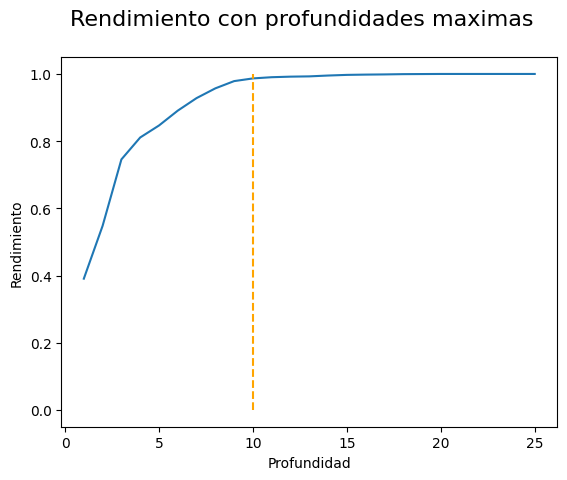

In [160]:
X_dev, X_holdOut, y_dev, y_holdOut = train_test_split(imgs, chrs, test_size=0.3) #separo en dev y holdout
accuracy = []
for i in range(1, 26):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_dev, y_dev) #Entrena
    y_pred = clf.predict(X_dev) #Prediccion
    accuracy.append((accuracy_score(y_dev, y_pred))) #Veo la prediccion contra el valor real
    
data = pd.DataFrame({'max_depth':range(1,26),'accuracy':accuracy})
fig, axes = plt.subplots()
fig.suptitle('Rendimiento con profundidades maximas', fontsize=16)
data.plot(kind='line',x ='max_depth',y ='accuracy',xlabel='Profundidad',ylabel='Rendimiento',legend = False, ax = axes)
plt.plot((10, 10), (0, 1.0001), linestyle='--', color='orange');

## 3) Exploro hiperparametros y comparo con K-Folding

Uso 10 de profundidad por el punto 2)

In [132]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

dtcGini = DecisionTreeClassifier(criterion='gini', random_state=42)
dtcEntr = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtcLog = DecisionTreeClassifier(criterion='log_loss', random_state=42)
dtcRand = DecisionTreeClassifier(splitter='random', random_state=42)
dtcLog2 = DecisionTreeClassifier(max_features='log2', random_state=42)
dtcBalanced = DecisionTreeClassifier(criterion='entropy',class_weight='balanced')

scoresGini = cross_val_score(dtcGini, X_dev, y_dev, cv=kf)
scoresEntr = cross_val_score(dtcEntr, X_dev, y_dev, cv=kf)
scoresLog = cross_val_score(dtcLog, X_dev, y_dev, cv=kf)
scoresRand = cross_val_score(dtcRand, X_dev, y_dev, cv=kf)
scoresLog2 = cross_val_score(dtcLog2, X_dev, y_dev, cv=kf)
scoresBalanced =cross_val_score(dtcBalanced, X_dev, y_dev, cv=kf)

table = pd.DataFrame({'Gini':scoresGini,'Entropy':scoresEntr,'Log':scoresLog,'Random':scoresRand,'Log2':scoresLog2,'Balanced':scoresBalanced})
table = table.mean(axis = 0)
table

Gini        0.851535
Entropy     0.868128
Log         0.868128
Random      0.847942
Log2        0.793761
Balanced    0.861485
dtype: float64

- Exploro posibles valores para min_samples_split

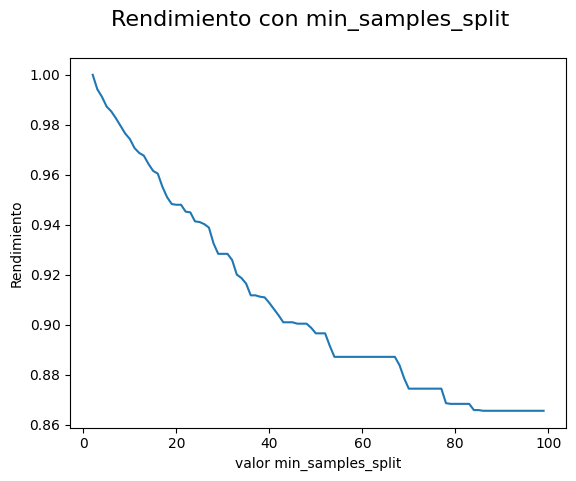

In [188]:
training = []
for i in range(2, 100):
    clf = DecisionTreeClassifier(min_samples_split= i,random_state=42)
    clf.fit(X_dev, y_dev)
    y_pred = clf.predict(X_dev)
    training.append((accuracy_score(y_dev, y_pred)))
data = pd.DataFrame({'max_depth':range(2,100),'accuracy':training})
fig, axes = plt.subplots()
fig.suptitle('Rendimiento con min_samples_split', fontsize=16)
data.plot(kind='line',x ='max_depth',y ='accuracy',xlabel='valor min_samples_split',ylabel='Rendimiento',legend = False, ax = axes );

- Exploro posibles valores para min_samples_leaf:

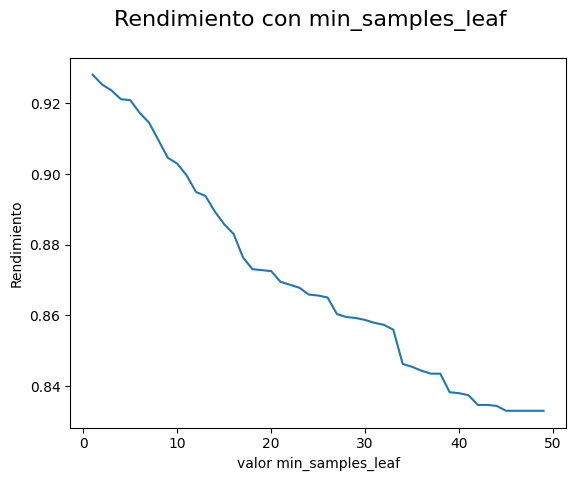

In [200]:
training = []

for i in range(1, 50):
    clf = DecisionTreeClassifier(min_samples_leaf= i,max_depth=7,random_state=42)
    clf.fit(X_dev, y_dev)
    y_pred = clf.predict(X_dev)
    training.append((accuracy_score(y_dev, y_pred)))
data = pd.DataFrame({'max_depth':range(1,50),'accuracy':training})
fig, axes = plt.subplots()
fig.suptitle('Rendimiento con min_samples_leaf', fontsize=16)
data.plot(kind='line',x ='max_depth',y ='accuracy',xlabel='valor min_samples_leaf',ylabel='Rendimiento',legend = False, ax = axes);

Veo que no hay mucha diferencia entre los hiperparametros, el de criterion='log_loss' llega a ser un poco mas efectivo, pero el cambio no es tan significativo como en el caso del max_depth

## 4) entrenamos el modelo y lo evaluamos

In [138]:
clf = DecisionTreeClassifier(criterion='log_loss',random_state=42)
clf.fit(X_dev, y_dev)
y_pred = clf.predict(X_holdOut)

#### - Evaluamos max depth con Hold-Out para validar:

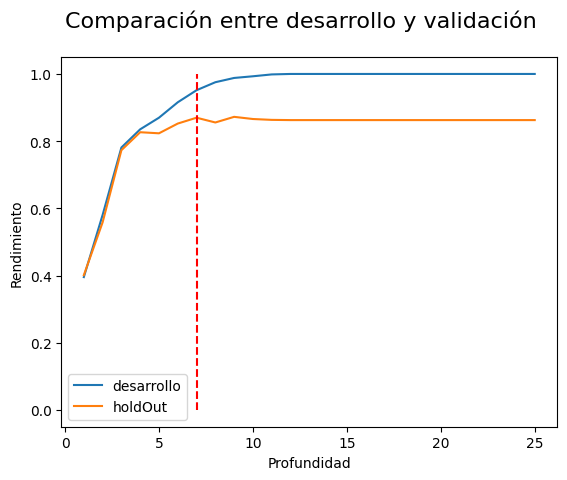

In [171]:
training = []
holdOut = []
for i in range(1, 26):
    clf = DecisionTreeClassifier(criterion='log_loss',max_depth=i,random_state=42)
    clf.fit(X_dev, y_dev)
    y_pred = clf.predict(X_dev)
    y_predHoldOut = clf.predict(X_holdOut)
    training.append((accuracy_score(y_dev, y_pred)))
    holdOut.append((accuracy_score(y_holdOut, y_predHoldOut)))
data = pd.DataFrame({'max_depth':range(1,26),'desarrollo':training,'holdOut':holdOut})
fig, axes = plt.subplots()
fig.suptitle('Comparación entre desarrollo y validación', fontsize=16)
data.plot(kind='line',x ='max_depth',y =['desarrollo','holdOut'],xlabel='Profundidad',ylabel='Rendimiento', ax = axes)
plt.plot((7, 7), (0, 1.0001), linestyle='--', color='red');

- Confirmo valor de min_samples_leaf

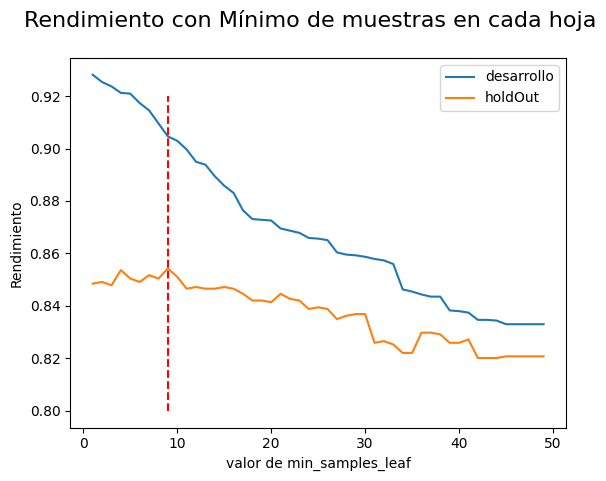

In [208]:
training = []
holdOut = []
for i in range(1, 50):
    clf = DecisionTreeClassifier(min_samples_leaf= i,max_depth=7,random_state=42)
    clf.fit(X_dev, y_dev)
    y_pred = clf.predict(X_dev)
    y_predHoldOut = clf.predict(X_holdOut)
    training.append((accuracy_score(y_dev, y_pred)))
    holdOut.append((accuracy_score(y_holdOut, y_predHoldOut)))
data = pd.DataFrame({'max_depth':range(1,50),'desarrollo':training,'holdOut':holdOut})
fig, axes = plt.subplots()
fig.suptitle('Rendimiento con Mínimo de muestras en cada hoja', fontsize=16)
data.plot(kind='line',x ='max_depth',y =['desarrollo','holdOut'],xlabel='valor de min_samples_leaf',ylabel='Rendimiento', ax = axes)
plt.plot((9, 9), (0.8, 0.920001), linestyle='--', color='red');

- Confirmo valor de min_samples_split

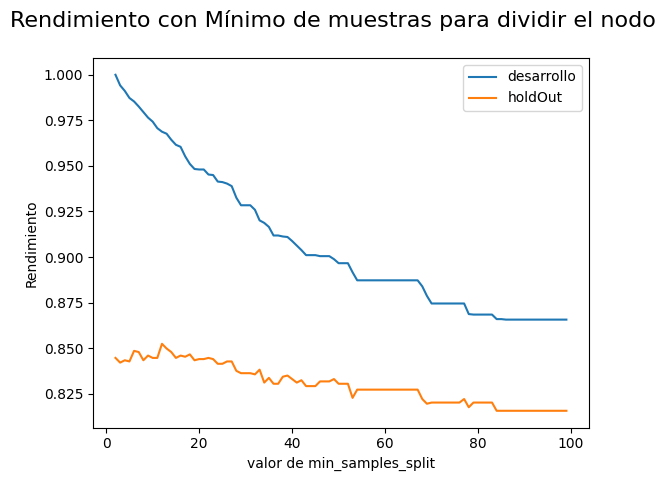

In [210]:
training = []
holdOut = []
for i in range(2, 100):
    clf = DecisionTreeClassifier(min_samples_split= i,random_state=42)
    clf.fit(X_dev, y_dev)
    y_pred = clf.predict(X_dev)
    y_predHoldOut = clf.predict(X_holdOut)
    training.append((accuracy_score(y_dev, y_pred)))
    holdOut.append((accuracy_score(y_holdOut, y_predHoldOut)))
data = pd.DataFrame({'max_depth':range(2,100),'desarrollo':training,'holdOut':holdOut})
fig, axes = plt.subplots()
fig.suptitle('Rendimiento con Mínimo de muestras para dividir el nodo', fontsize=16)
data.plot(kind='line',x ='max_depth',y =['desarrollo','holdOut'],xlabel='valor de min_samples_split',ylabel='Rendimiento', ax = axes);

- Matriz de confusion:

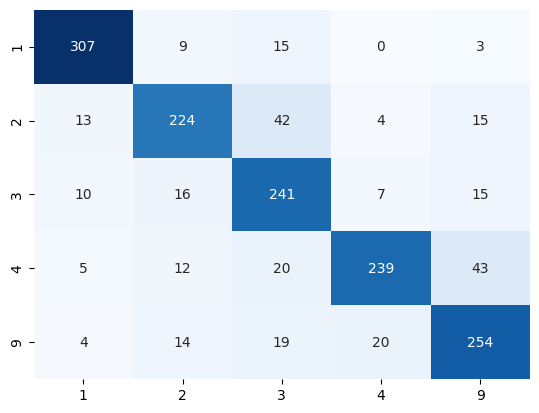

In [225]:
y_pred = clf.predict(X_holdOut)
cf_matrix = confusion_matrix(y_holdOut, y_pred)
sns.heatmap(cf_matrix,xticklabels=[1,2,3,4,9],yticklabels=[1,2,3,4,9], annot=True, fmt='d', cmap='Blues', cbar=False);

En la matriz de confusión, se observa que las clases correspondientes a los números 3 y 4 presentan una mayor tasa de confusión entre sí, indicando que el modelo tiende a clasificarlos incorrectamente el uno como el otro. De manera similar, las clases de los números 9 y 4 también muestran una confusión considerable, lo cual sugiere que estos dígitos comparten características que dificultan su distinción para el modelo.